In [1]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
import potentials
import neighbors
from opinions import OpinionModel
import time
start = time.clock()

In [2]:
models = []
num_models = 10
#potential_values = np.linspace(0, 1, num_models)
for i in range(num_models):
    nsteps=200
    nagents=20
    #P = []
    #for i in range(nagents):
    #    arr = []
    #    for j in range(nagents):
    #        arr.append(-1)
    #    P.append(arr)
    neighbs = neighbors.totally_connected(nagents, self_connected=True)
    #neighbors = degree_connected(nagents, 1) #the second parameter ranges from 0 to 1, generates graphs of varying degrees of connectedness.
    linspaced = np.linspace(0, 1, nagents).tolist()
    opinions = [[i] for i in linspaced]
    #opinions = #[[np.random.rand()] for i in range(nagents)]
    #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
    pots = [potentials.tent(.63) for i in range(nagents)]
    coupling = [[1]]
    model = OpinionModel(nagents, neighbs, opinions, pots, coupling, 'pairwise')
    models.append(model)

In [3]:
import cProfile
def fn():
    for model in models:
        model.ALPHA = .01
        model.run(nsteps)
cProfile.run('fn()')

         2257241 function calls in 12.831 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   12.831   12.831 <ipython-input-3-3c05b1d62643>:2(fn)
        1    0.000    0.000   12.831   12.831 <string>:1(<module>)
     2000    0.153    0.000    0.220    0.000 datacollection.py:133(collect)
   113898    0.243    0.000    0.243    0.000 opinions.py:10(clamp)
    40000    0.833    0.000    1.019    0.000 opinions.py:108(coupling)
    40000    0.057    0.000    0.057    0.000 opinions.py:110(<listcomp>)
    40000    3.439    0.000    5.340    0.000 opinions.py:121(noise)
     2000    0.017    0.000   12.825    0.006 opinions.py:179(step)
       10    0.006    0.001   12.831    1.283 opinions.py:186(run)
    40000    0.032    0.000    0.032    0.000 opinions.py:198(<lambda>)
    40000    0.208    0.000    0.226    0.000 opinions.py:53(reset)
    40000    1.873    0.000    5.039    0.000 opinions.py:57(p

In [4]:
def fn2():
    agent_opinions = []
    for model in models:
        agent_opinion = model.datacollector.get_agent_vars_dataframe()
        agent_opinions.append(agent_opinion)
cProfile.run('fn2()')

         257674 function calls (257474 primitive calls) in 1.153 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      300    0.001    0.000    0.003    0.000 <frozen importlib._bootstrap>:996(_handle_fromlist)
        1    0.045    0.045    1.152    1.152 <ipython-input-4-fb5b18aa0773>:1(fn2)
        1    0.000    0.000    1.152    1.152 <string>:1(<module>)
       10    0.000    0.000    0.000    0.000 __init__.py:120(lzip)
    40090    0.106    0.000    0.160    0.000 __init__.py:177(iteritems)
       30    0.000    0.000    0.001    0.000 _methods.py:37(_any)
       20    0.000    0.000    0.001    0.000 _methods.py:40(_all)
       20    0.000    0.000    0.000    0.000 _validators.py:220(validate_bool_kwarg)
       20    0.000    0.000    0.003    0.000 algorithms.py:132(_reconstruct_data)
       20    0.000    0.000    0.000    0.000 algorithms.py:1337(_get_take_nd_function)
       20    0.002    0.000    0.010    0.0

In [ ]:

for model in models:
    model.ALPHA = .01
    model.run(nsteps)
agent_opinions = []
for model in models:
    agent_opinion = model.datacollector.get_agent_vars_dataframe()
    agent_opinions.append(agent_opinion)
x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))
plt.plot(x)

In [27]:
from analysis import opinions_clusters
from analysis import num_clusters
sum = 0
for i in range(num_models):
    for j in range(len(opinions[0])):
        print("Model %d Opinion %d:" % (i, j))
        print(num_clusters(models[i], .4)[j])
        sum += num_clusters(models[i], .4)[j]

print(sum)
print("average: %f" %(float(sum) / float(num_models)))
#len(opinions_clusters(models[0])[0])

Model 0 Opinion 0:
2
2
average: 2.000000


In [72]:
print("Time taken (.seconds): ")
print(time.clock() - start)

Time taken (.seconds): 
23.518944000000005


In [48]:
num_models
linspaced = np.linspace(0, 1, nagents).tolist()
linspaced

[0.0,
 0.05263157894736842,
 0.10526315789473684,
 0.15789473684210525,
 0.21052631578947367,
 0.2631578947368421,
 0.3157894736842105,
 0.3684210526315789,
 0.42105263157894735,
 0.47368421052631576,
 0.5263157894736842,
 0.5789473684210527,
 0.631578947368421,
 0.6842105263157894,
 0.7368421052631579,
 0.7894736842105263,
 0.8421052631578947,
 0.894736842105263,
 0.9473684210526315,
 1.0]

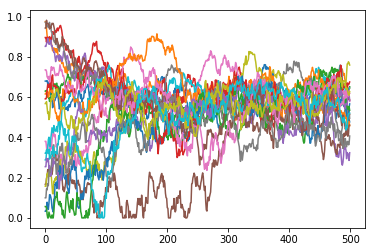

In [5]:

tau = 1
while tau > .7:
    models = []
    num_models = 1
    #potential_values = np.linspace(0, 1, num_models)
    for i in range(num_models):
        nsteps=500
        nagents=20
        #P = []
        #for i in range(nagents):
        #    arr = []
        #    for j in range(nagents):
        #        arr.append(-1)
        #    P.append(arr)
        neighbs = neighbors.totally_connected(nagents, self_connected=True)
        #neighbors = degree_connected(nagents, 1) #the second parameter ranges from 0 to 1, generates graphs of varying degrees of connectedness.
        linspaced = np.linspace(0, 1, nagents).tolist()
        #opinions = [[i] for i in linspaced]
        opinions = [[np.random.rand()] for i in range(nagents)]
        #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
        pots = [potentials.tent(tau) for i in range(nagents)]
        coupling = [[1]]
        model = OpinionModel(nagents, neighbs, opinions, pots, coupling, 'pairwise')
        models.append(model)
    for model in models:
        model.ALPHA = .005
        model.run(nsteps)
    agent_opinions = []
    for model in models:
        agent_opinion = model.datacollector.get_agent_vars_dataframe()
        agent_opinions.append(agent_opinion)
    x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))
    plt.plot(x)
    from analysis import opinions_clusters
    from analysis import num_clusters
    sum = 0
    for i in range(num_models):
        for j in range(len(opinions[0])):
            #print("Model %d Opinion %d:" % (i, j))
            #print(num_clusters(models[i], .4)[j])
            sum += num_clusters(models[i], .4)[j]

    #print(sum)
    #print("average: %f for tau: %f" %(float(sum) / float(num_models), tau))
    tau = .5